# Comments on this document
This is the main file for the data handling and manipulation. All tasks are carried out in external functions in separate .py files to keep the notebook clean.

In [ ]:
# import the required packages. Add more if necessary
import pandas as pd # data processing
import numpy as np # data processing
import matplotlib.pyplot as plt # create plots
import plotly.graph_objects as go # create interactive plots
import os # interaction with operating system
import numpy as np
import pandas as pd
import Data_Import
import Data_Cleaning
import Data_Analysis
import Data_Visualization
import Helper
import WatBalMod
import AR_Model as ar
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.dates import DateFormatter
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
# Load AutoReg class from statsmodels.tsa.ar_model module
#
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.tsa
import sammhelper as sh
import plotly.express as px
#https://vitalflux.com/autoregressive-ar-models-with-python-examples/


In [ ]:
## You don't need to change this cell. Always reloads modules (external functions) when cell is executed so that the newest version is used
%load_ext autoreload
%autoreload 2

In [ ]:
# Adjust this cell with your preferences
# Settings of plots
figSize = [14, 14] # size of figures
fontSize = 16 # Size of numbers and text in plots
lineWidth = 1.5 # linewidth in plots

# adapts the plot settings for all future plots
plt.rcParams['figure.figsize'] = figSize
plt.rcParams['font.size'] = fontSize
plt.rcParams['lines.linewidth'] = lineWidth

path_to_data_folder = 'Data' # Provide the path to the folder containing the data
latest_data_directory = os.path.join('spring_data', 'wabesense_discharge_2023-09-01')
new_spring_data_available = False
new_meteo_data_available = False


path_to_plot_folder = 'Plots' # Enter a name for the folder where the plots will be saved
plotFileType = 'pdf' # 'pdf' or 'png'; filetype for the plots

if not os.path.isdir(path_to_plot_folder): # creates the folder if it does not exist yet
    os.makedirs(path_to_plot_folder)

# read and visualize spring data

In [ ]:
# returns multiple lists
spring_names, spring_description, spring_data_paths, spring_data_dfs = Data_Import.import_spring_data(
    os.path.join(path_to_data_folder, latest_data_directory))

In [ ]:
# clean the data: keep only valid data range
valid_spring_data_dfs = {}
for name, df in spring_data_dfs.items():
    df = Data_Cleaning.keep_only_valid_data(df)
    valid_spring_data_dfs[name] = df

In [ ]:
# create and save dataframes with different time resolutions for all springs else import the already resampled data
save_path = os.path.join(path_to_data_folder, 'spring_data', 'resampled_data')
resolutions = ['H', 'D', 'W', 'M']  # Hourly, Daily, Weekly, Monthly
resampled_spring_data_dfs = {}
if new_spring_data_available:
    for name, df in valid_spring_data_dfs.items():
        resampled_spring_data_dfs[name] = Data_Cleaning.resample_and_save_spring_data(df, resolutions, save_path, spring_name=name,new_data_available=new_spring_data_available)
else:
    resampled_spring_data_dfs =Data_Import.import_resampled_data(save_path)

# THis PART IS NOT NEEDED 

In [ ]:
#make it possible to access the avlid_spring_data_dfs with indexes:
valid_spring_data_dfs = list(valid_spring_data_dfs.values())

In [ ]:
# create and save dataframes with different time resolutions for Ulrika and Paliu Fravi
path_to_folder = os.path.join(path_to_data_folder, 'spring_data', 'resampled_data')
resolutions = ['H', 'D', 'W', 'M']  # Hourly, Daily, Weekly, Monthly
paliufravi_dfs = Data_Cleaning.resample_and_save_spring_data(valid_spring_data_dfs[0], resolutions, path_to_folder, spring_name='Paliu_Fravi',new_spring_data_available)
ulrika_dfs = Data_Cleaning.resample_and_save_spring_data(valid_spring_data_dfs[8], resolutions, path_to_folder, spring_name='Ulrika',new_spring_data_available)

In [ ]:
#print(spring_description[0])
# Create a list of values from the dictionary
#values_list = list(valid_spring_data_dfs.values())
#values_list[0]

In [ ]:
for i in range(0, len(valid_spring_data_dfs)):
     # takes a lot of time
    
    fig_single_spring = Data_Visualization.plot_single_spring(spring_names[i], valid_spring_data_dfs[i], spring_description[i], path_to_plot_folder)

In [ ]:
# Example usage just to get one single plot and to adjust what is needed:

saved_figure_path = Data_Visualization.plot_single_spring(spring_names[0], valid_spring_data_dfs[0], spring_description[0], path_to_plot_folder)

if saved_figure_path:
    print(f"Figure saved at: {saved_figure_path}")
else:
    print("Figure could not be saved due to an error.")
    
    

# SNOW

In [ ]:
#Read an visualize the snow data to chose the date use the format '2020-01-01'
schnee_flims = Data_Import.import_snow_data("5PL0_schnee_flims.csv",'2020-10-01','2023-05-02')
schnee_thusis = Data_Import.import_snow_data("5TH0_thusis_schnee.csv",'1990-10-01','2023-05-02')

#Data_Visualization.plot_snow(schnee_flims,schnee_thusis,"schnee_thusis_flims")
Data_Visualization.plot_snow_one(schnee_flims,"schnee")
#Data_Visualization.plot_snow(schnee_flims,2020,2023)


In [ ]:
# Read an visualize the measurment campaign data together with the spring data
mc_u,mc_pf = Data_Import.import_mc_data("sites_ref_manual_measurements.xlsx")
path = "/Users/ramunbar/Documents/Master/3_Semester/GITHUB/ETH_MP_Alpine_Water_Springs_Modelling/Plots/spring_plots/MC_comparison"

# Convert the "datetime" column to datetime with "Europe/Zurich" time zone
mc_pf['datetime'] = pd.to_datetime(mc_pf['datetime']).dt.tz_localize('Europe/Zurich')
mc_u['datetime'] = pd.to_datetime(mc_u['datetime']).dt.tz_localize('Europe/Zurich')
#chose mc_pf and numbers [0] to find the spring of interest
Data_Visualization.plot_spring_data_and_mc(spring_names[0], valid_spring_data_dfs[0], spring_description[0], path,mc_pf)


# read and visualize the meteo data

In [ ]:
print(valid_spring_data_dfs[0])

In [ ]:
meteo_folders = ['Freienbach', 'Oberriet_Kriessern', 'Oberriet_Moos', 'Reichenau', 'Chur', 'Rothenbrunnen', 'Thusis']
meteo_data_dfs = {}
for folder in meteo_folders:
    folder_path = os.path.join(path_to_data_folder, 'meteo_data', 'raw_data', folder)
    data_file = Data_Import.find_file_with_pattern(folder_path)
    data_frames = Data_Import.read_multi_dataset_txt_file(data_file, delimiter=';')
    meteo_data_dfs[folder] = data_frames

In [ ]:
# add the timezone to the spring data
for station, df_list in meteo_data_dfs.items():
    for df in df_list:
        Data_Cleaning.add_timezone_to_dataframe(df, 'UTC')

In [ ]:
# only precipitation
# create and save dataframes with different time resolutions for all Meteostations if new data available
#else import the already resampled data

save_path = os.path.join(path_to_data_folder, 'meteo_data', 'resampled_data')
resolutions = ['D', 'W', 'M']  # Hourly, Daily, Weekly, Monthly^
if new_meteo_data_available:    
    resampled_precip_data_dfs = {} # Dictionary to store the resampled dataframes
    for station in ['Freienbach', 'Oberriet_Moos', 'Chur', 'Rothenbrunnen', 'Thusis']:
        resampled_precip_data_dfs[station] = Data_Cleaning.resample_and_save_precip_data(meteo_data_dfs[station], resolutions, save_path, station, new_meteo_data_available)
else:
    resampled_precip_data_dfs = Data_Import.import_resampled_data(save_path)

In [ ]:
# only precipitation
# create and save dataframes with different time resolutions for all Meteostations if new data available
#else import the already resampled data

save_path = os.path.join(path_to_data_folder, 'meteo_data', 'resampled_data')
resolutions = ['D', 'W', 'M']  # Hourly, Daily, Weekly, Monthly^
if new_meteo_data_available:    
    resampled_temp_data_dfs = {} # Dictionary to store the resampled dataframes
    for station in ['Freienbach', 'Oberriet_Moos', 'Chur', 'Rothenbrunnen', 'Thusis']:
        resampled_temp_data_dfs[station] = Data_Cleaning.resample_and_save_precip_data(meteo_data_dfs[station], resolutions, save_path, station, new_meteo_data_available)
else:
    resampled_temp_data_dfs = Data_Import.import_resampled_data(save_path)

In [ ]:
for station, df_list in meteo_data_dfs.items():
    pass # takes a lot of time to run
    #Data_Visualization.plot_meteo_precipitation(df_list[1], station, path_to_plot_folder)

# AR Model

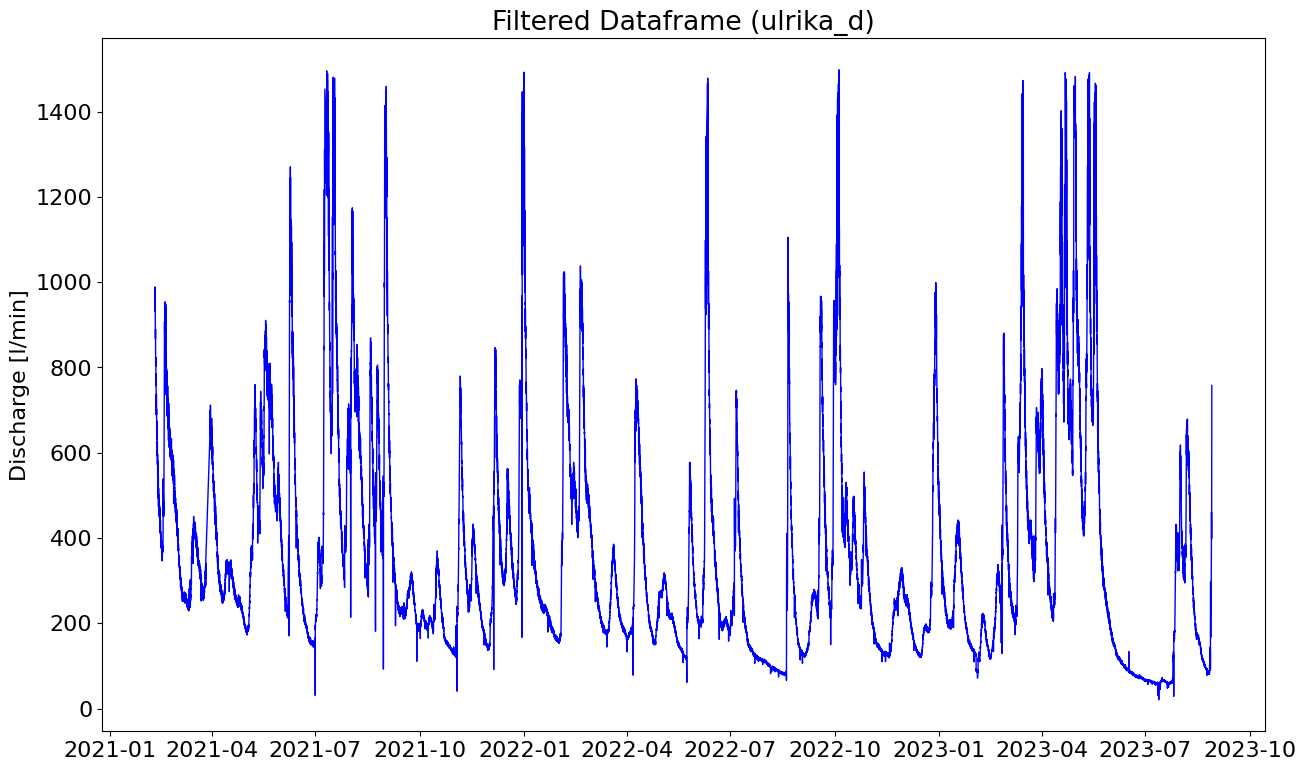

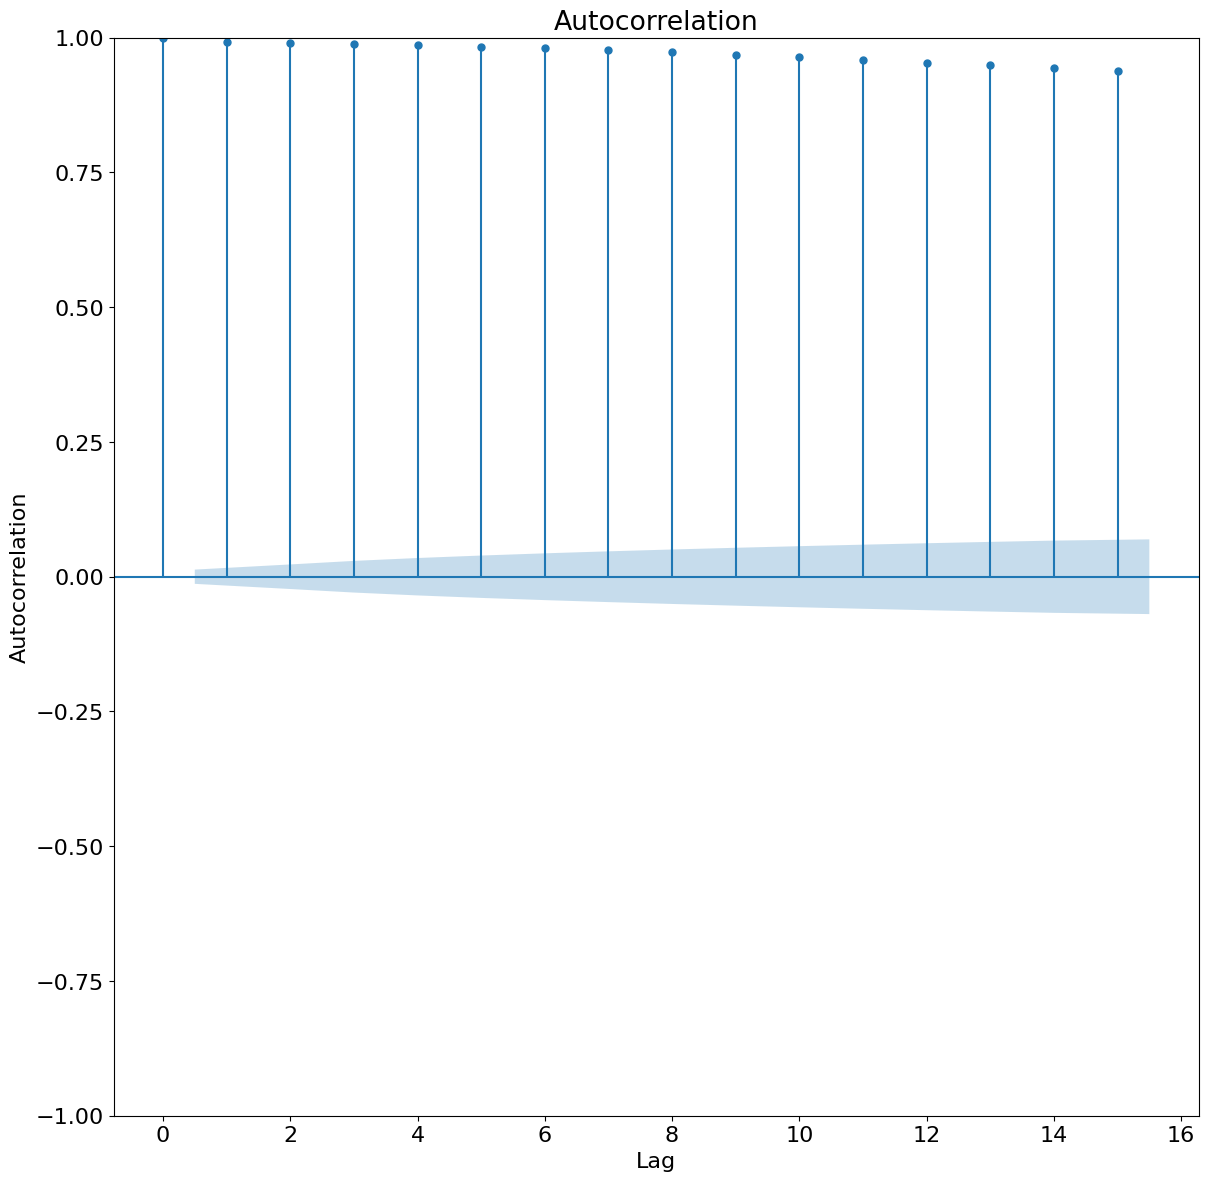

In [92]:
path_to_save_ar_figures = "/Users/ramunbar/Documents/Master/3_Semester/GITHUB/ETH_MP_Alpine_Water_Springs_Modelling/Plots/AR_model"
#read the cleaned data from ulrika and make an acf plot
start = None
end = None
resolution = ('H', 'H')
ulrika_d = Data_Cleaning.get_ulrika(True,resampled_spring_data_dfs, resolution , start ,end) # temporal resolution of spring and precipitation: '10min' 'H', 'D', 'M'  # 10min not for all meteo st.)
ar.plots.acf(ulrika_d, 15,path_to_save_ar_figures)

In [93]:
# Create a new dataframe 'df_ulrika' which has time as number of days and discharge as columns
df_ulrika = pd.DataFrame({
    'time': range(1, len(ulrika_d) + 1),  # Start from 1 and increment by 1
    'discharge': ulrika_d['discharge(L/min)']
})
time = df_ulrika["time"]
discharge = df_ulrika["discharge"]
discharge = discharge.reset_index(drop=True)

In [94]:
# create new dataframe for AR() hourly
ulrika_h = pd.DataFrame({"time":ulrika_d.index,"discharge":ulrika_d['discharge(L/min)']})
print(ulrika_h)

                                               time   discharge
datetime                                                       
2021-02-09 23:00:00+00:00 2021-02-09 23:00:00+00:00  940.450000
2021-02-10 00:00:00+00:00 2021-02-10 00:00:00+00:00  941.283333
2021-02-10 01:00:00+00:00 2021-02-10 01:00:00+00:00  988.966667
2021-02-10 02:00:00+00:00 2021-02-10 02:00:00+00:00  931.783333
2021-02-10 03:00:00+00:00 2021-02-10 03:00:00+00:00  938.566667
...                                             ...         ...
2023-08-28 11:00:00+00:00 2023-08-28 11:00:00+00:00  398.800000
2023-08-28 12:00:00+00:00 2023-08-28 12:00:00+00:00  432.116667
2023-08-28 13:00:00+00:00 2023-08-28 13:00:00+00:00  528.433333
2023-08-28 14:00:00+00:00 2023-08-28 14:00:00+00:00  752.016667
2023-08-28 15:00:00+00:00 2023-08-28 15:00:00+00:00  757.950000

[21960 rows x 2 columns]


P-value:  3.6702804884422465e-13


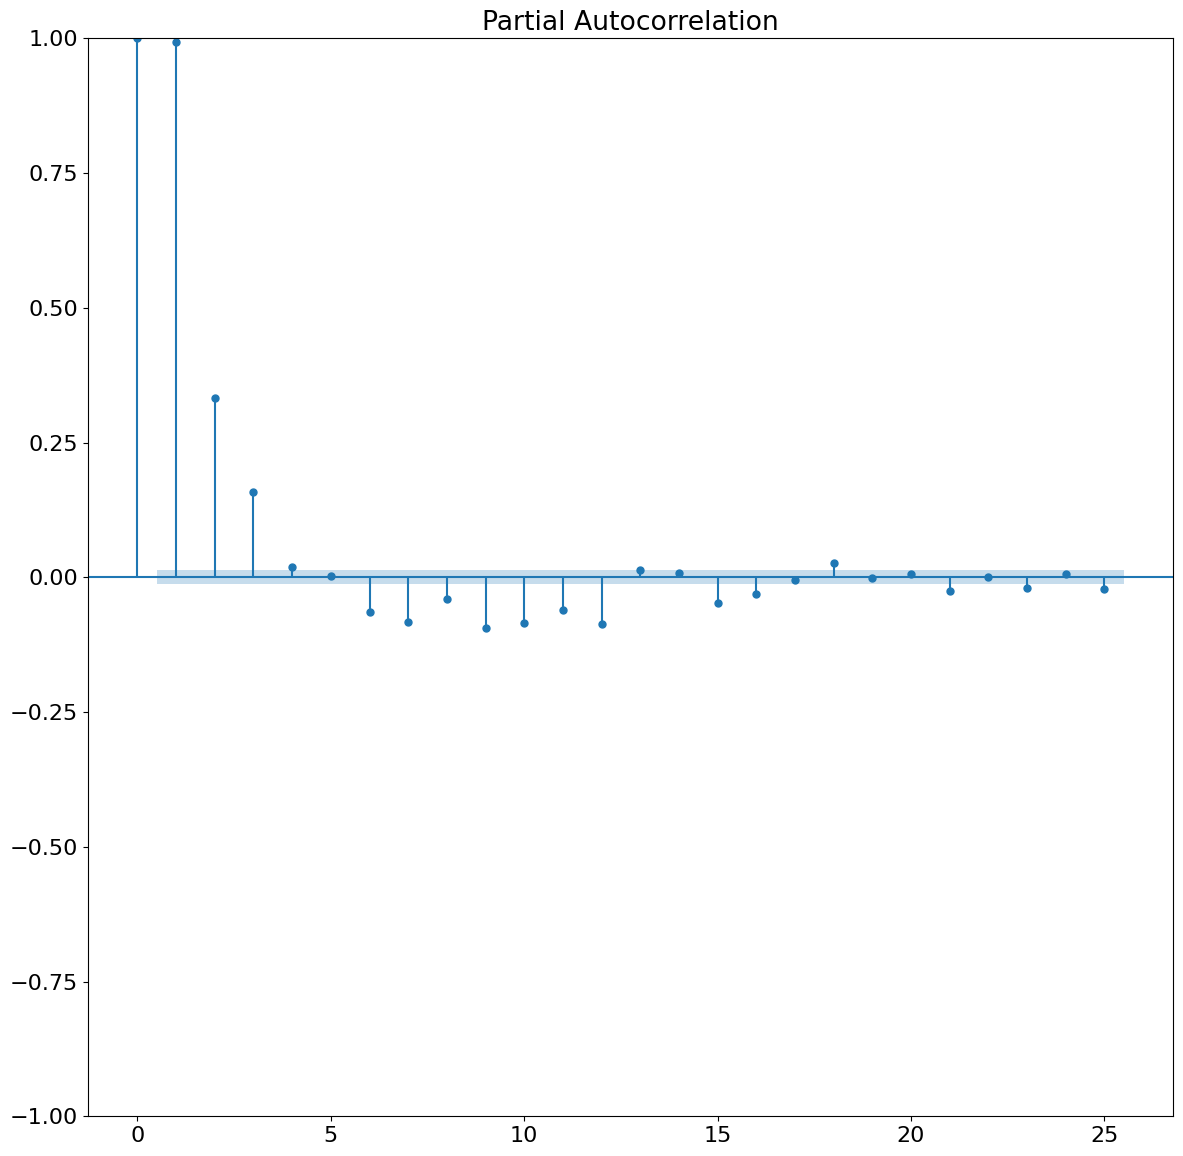

In [95]:

# Check for stationarity of the time-series data
# We will look for p-value. In case, p-value is less than 0.05, the time series
# data can said to have stationarity
#

#
# Run the test
#
stationarityTest = adfuller(discharge, autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", stationarityTest[1])
#
# Next step is to find the order of AR model to be trained
# for this, we will plot partial autocorrelation plot to assess
# the direct effect of past data on future data
#
pacf = plot_pacf(discharge, lags=25)

In [ ]:
#
# Create training and test data
#
def split_data(data):
    # Calculate the index to split the data in half
    split_index = len(data) // 2
    
    # Split the data into training and test sets
    training_data = data[:split_index]
    test_data = data[split_index:]
    
    return training_data, test_data


train_data, test_data = split_data(discharge)
print(train_data)

In [ ]:

#
# Instantiate and fit the AR model with training data
#
ar_model = AutoReg(train_data, lags=1).fit()
# Print Summary
#
ar_model_summary = ar_model.summary()

In [ ]:
params = np.array([value for key, value in ar_model_summary.tables[1]])

In [ ]:
#
# Make the predictions
#
#pred = ar_model.predict(start=len(train_data), end=(len(discharge)-1), dynamic=False)
#
pred = ar_model.predict(start= 0, end = 10000)

# Plot the prediction vs test data
#
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')

In [ ]:

df = pd.DataFrame({'discharge': pred})
df["time"] = test_data.index

In [ ]:
print(df)
print(type(pred))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['discharge'], marker='o', linestyle='-', label='discharge')
plt.plot(test_data.index, test_data, marker='o', linestyle='-', label='test_data')
plt.title('Discharge and Test Data over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()  # Add a legend to distinguish between discharge and test_data
plt.grid(True)
plt.show()



In [ ]:
print(ulrika_h)


# NEW TRY

In [101]:
#use this link https://lmc2179.github.io/posts/autoreg.html

from patsy import dmatrix, build_design_matrices
df = ulrika_h
#reset index that it is not the date
df = df.reset_index(drop=True)
df['log_discharge'] = np.log(df.discharge)
#df['year'] = df['Month'].apply(lambda x: int(x.split('-')[0]))
#df['month_number'] = df['Month'].apply(lambda x: int(x.split('-')[1]))
df['t'] = df.index.values
print(df)

                           time   discharge  log_discharge      t
0     2021-02-09 23:00:00+00:00  940.450000       6.846358      0
1     2021-02-10 00:00:00+00:00  941.283333       6.847244      1
2     2021-02-10 01:00:00+00:00  988.966667       6.896661      2
3     2021-02-10 02:00:00+00:00  931.783333       6.837100      3
4     2021-02-10 03:00:00+00:00  938.566667       6.844354      4
...                         ...         ...            ...    ...
21955 2023-08-28 11:00:00+00:00  398.800000       5.988460  21955
21956 2023-08-28 12:00:00+00:00  432.116667       6.068696  21956
21957 2023-08-28 13:00:00+00:00  528.433333       6.269917  21957
21958 2023-08-28 14:00:00+00:00  752.016667       6.622758  21958
21959 2023-08-28 15:00:00+00:00  757.950000       6.630617  21959

[21960 rows x 4 columns]


In [104]:
train_cutoff = 9503
validate_cutoff = 19006.67

train_df = df[df['t'] <= train_cutoff]
select_df = df[(df['t'] > train_cutoff) & (df['t'] <= validate_cutoff)]
forecast_df = df[df['t'] > validate_cutoff]
rain = pd.read_csv("/Users/ramunbar/Documents/Master/3_Semester/GITHUB/ETH_MP_Alpine_Water_Springs_Modelling/Data/meteo_data/resampled_precip_data/Freienbach/Freienbach_precip_H.csv")

# Assuming you have a DataFrame called 'df' with a column 'rain["rre150h0"]'

# Create a design matrix with 'rain["rre150h0"]' as an exogenous variable
dm = dmatrix('rain["rre150h0"]-1', df)

# Optionally, add a constant term to the design matrix
#dm = add_constant(dm)

# Extract design matrices for different subsets of the data
train_exog = build_design_matrices([dm.design_info], train_df, return_type='dataframe')[0]
select_exog = build_design_matrices([dm.design_info], select_df, return_type='dataframe')[0]
forecast_exog = build_design_matrices([dm.design_info], forecast_df, return_type='dataframe')[0]

PatsyError: Number of rows mismatch between data argument and rain["rre150h0"] (21960 versus 28512)
    rain["rre150h0"]-1
    ^^^^^^^^^^^^^^^^

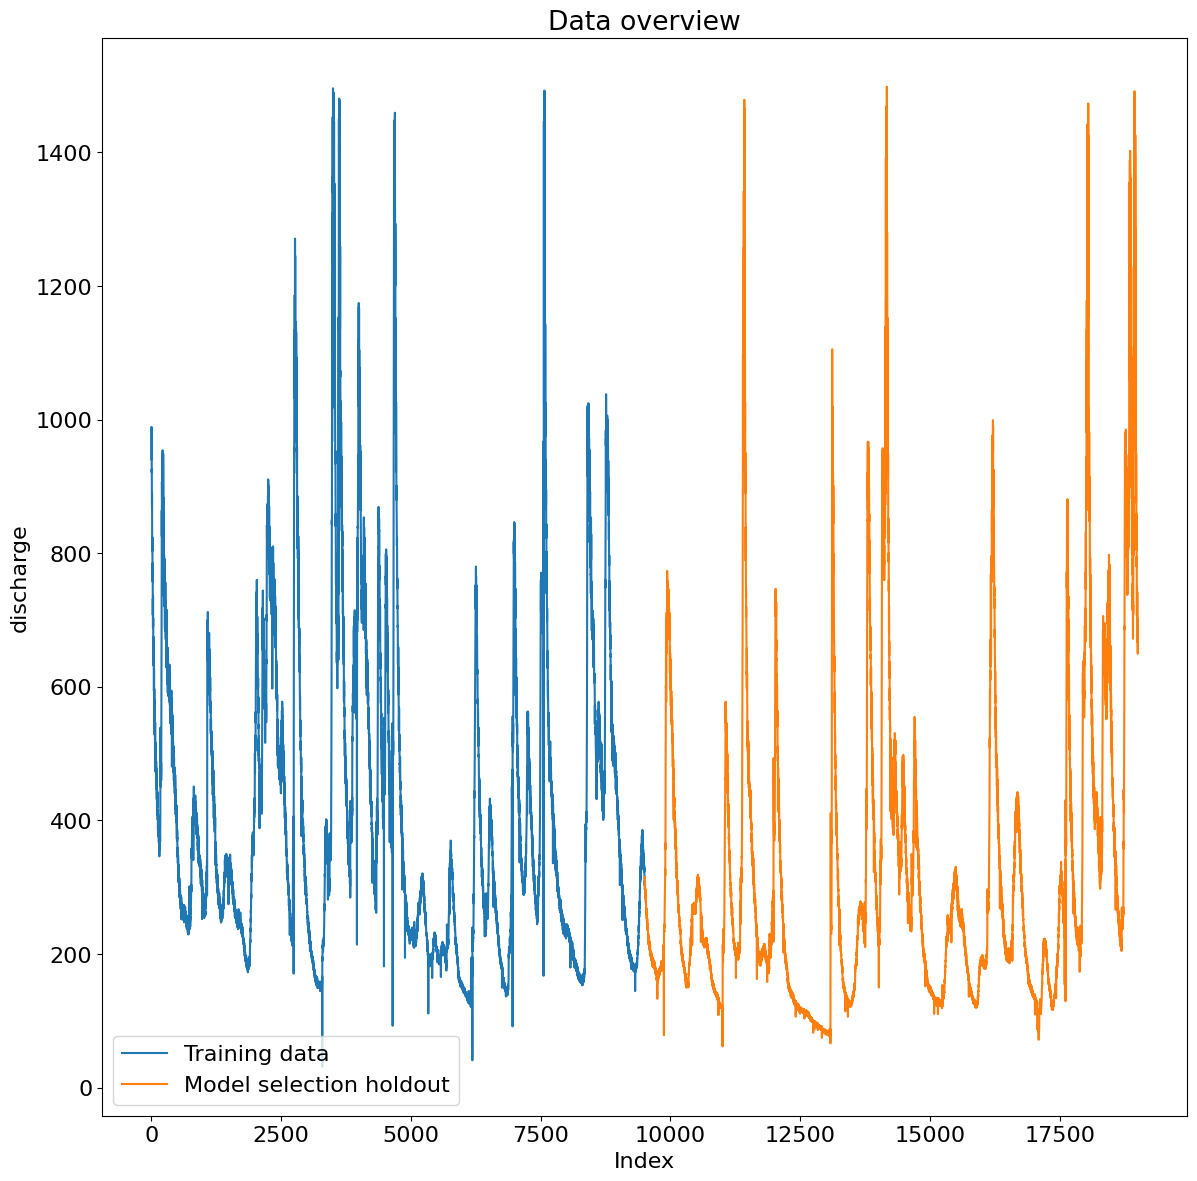

In [103]:
plt.plot(train_df.t, train_df.discharge, label='Training data')
plt.plot(select_df.t, select_df.discharge, label='Model selection holdout')
plt.legend()
plt.title('Data overview')
plt.ylabel('discharge')
plt.xlabel('Index')
plt.show()


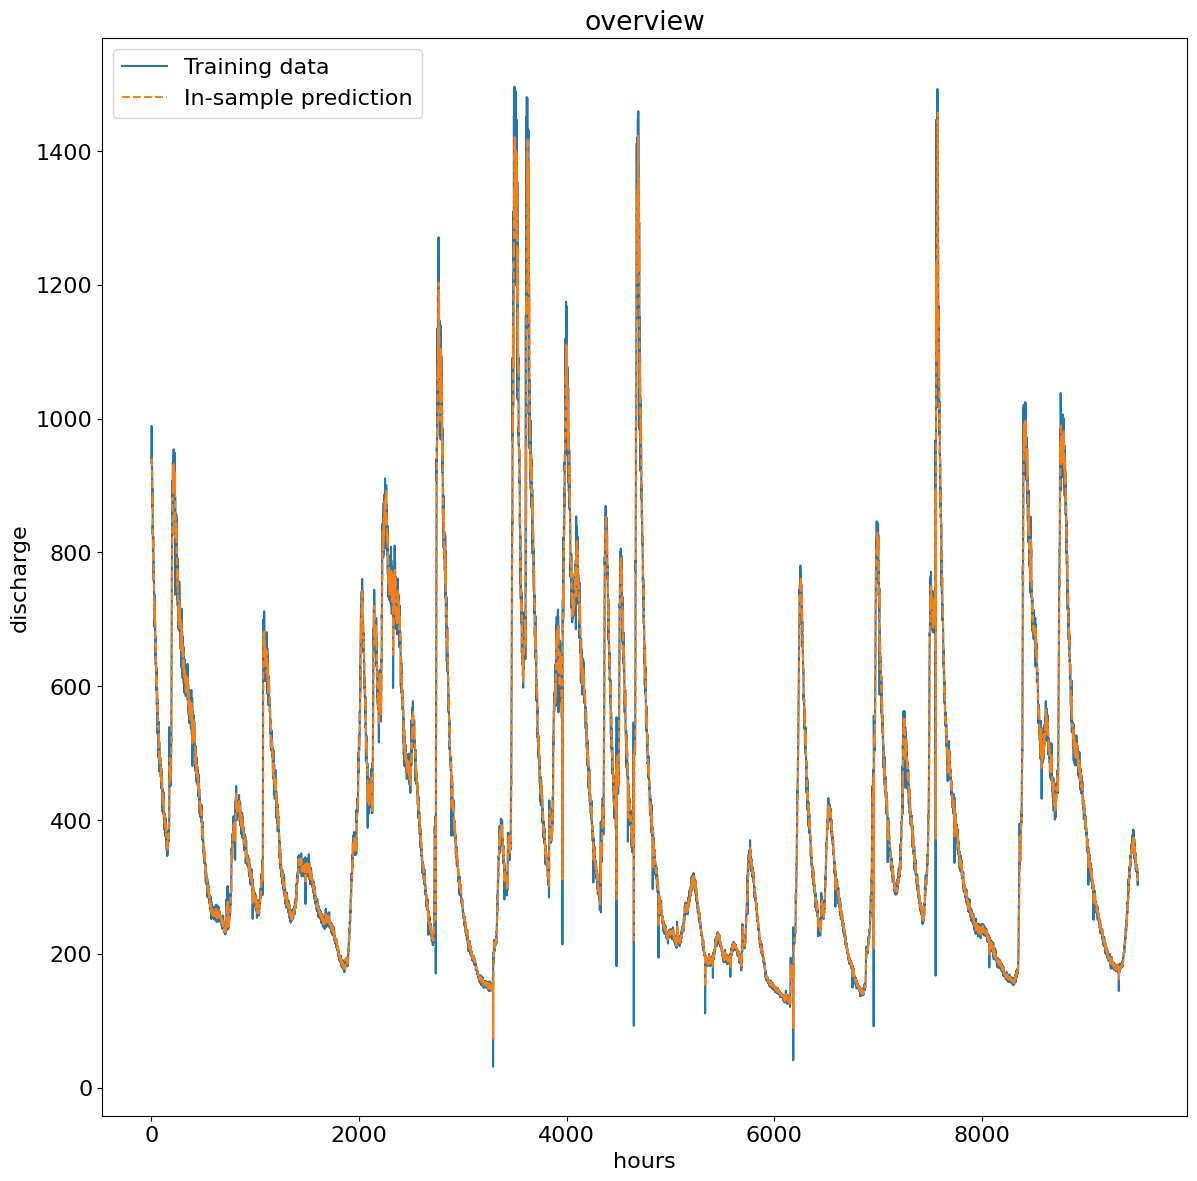

In [89]:
ar_model = AutoReg(endog=train_df.log_discharge,  lags=5 )
ar_fit = ar_model.fit()

train_log_pred = ar_fit.predict(start=train_df.t.min(), end=train_df.t.max())

plt.plot(train_df.t, train_df.discharge, label='Training data')
plt.plot(train_df.t, 
         np.exp(train_log_pred), linestyle='dashed', label='In-sample prediction')
plt.legend()
plt.title('overview')
plt.ylabel('discharge')
plt.xlabel('hours')
plt.show()

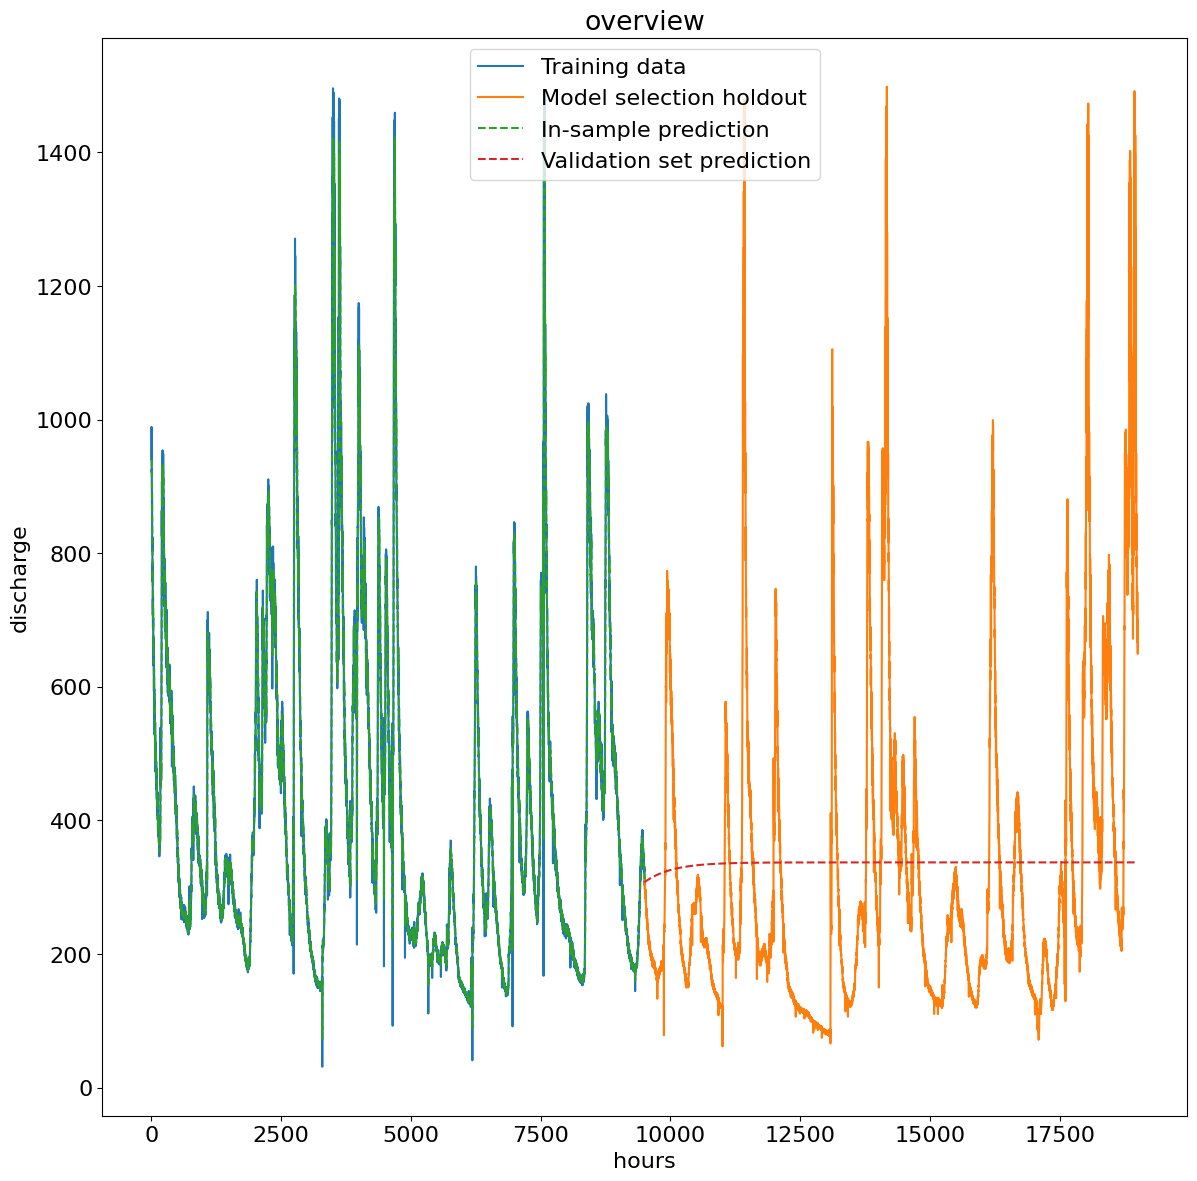

In [90]:
select_log_pred = ar_fit.predict(start=select_df.t.min(), end=select_df.t.max())

plt.plot(train_df.t, train_df.discharge, label='Training data')
plt.plot(select_df.t, select_df.discharge, label='Model selection holdout')
plt.plot(train_df.t, 
         np.exp(train_log_pred), linestyle='dashed', label='In-sample prediction')
plt.plot(select_df.t, 
         np.exp(select_log_pred), linestyle='dashed', label='Validation set prediction')
plt.legend()
plt.title('overview')
plt.ylabel('discharge')
plt.xlabel('hours')
plt.show()

In [ ]:
#Plot frequency vs amp
frq, amp = ar.plots.plot_frq_vs_amp(df_ulrika,path_to_save_ar_figures)
ar.plots.plot_frq_vs_amp_static(df_ulrika,path_to_save_ar_figures)


In [ ]:
#gets u the model results with the model with only 3 cycles
# read from the fft Plot the values
d_avg = amp[0]
d_1 = amp[5]
d_2 = 73.91
d_3 = 34.19
frq_1= frq[5]
frq_2= 0.01851852
frq_3= 0.08061002
#with threshold 2000
#d_1 = 128.27
#d_2 = 97.196
#d_3 = 72.51
d_mod = ar.model_structure_samm.model_cycle(ulrika_d, True, time,d_avg,d_1,d_2,d_3,frq_1,frq_2,frq_3,path_to_save_ar_figures) # write true if u want a plot and false if u dont want one

In [ ]:
print(amp)

In [ ]:
#model with AR(1), trend and cycles, put in TRUE if u want plots and false if u dont want plots

d_mod_AR,res,res_1,h,h_1 = ar.model_structure_samm.model_ar_cycle(discharge,d_mod,time,d_avg,d_1,d_2,d_3, True, path_to_save_ar_figures,frq_1,frq_2, frq_3)





 

In [ ]:
print(np.mean(d_mod_AR))
print(np.mean(discharge))

In [ ]:
frq = pd.Series(frq)
print(type(frq))

ar.model_structure_samm.model_ar(discharge,time,d_avg, path_to_save_ar_figures)

In [ ]:
# Sign changes
nc = 0
for i in range(len(h)):
    if h[i] * h_1[i] < 0:
        nc += 1
v = nc / (len(h) - 1)
print(v)


# plot spring and meteo data together
## Ulrika

In [ ]:
# run this cell first to define parameters to create an interactive plot of spring discharge and precipitation
spring_name = 'Ulrika'
meteo_name = 'Freienbach'
resolution = ('10min', 'D') # temporal resolution of spring and precipitation: '10min' 'H', 'D', 'M'  # 10min not for all meteo st.
mc_data = mc_u #chose mc_u for ulrika and mc_pf for paliu fravi
start = "2023-04-25 10:00:00" # '2022-01-25'"2022-01-01" for april 2021 "2021-04-02 11:00:00 " for november 2021 "2021-11-10 05:00:00 " for Nov 2022: "2022-11-10 15:00:00 "
end = "2023-04-25 14:00:00" # '2022-02-25'"2022-02-02" for april 2021 "2021-04-02 12:00:00 " for all "2023-06-02 " for november 2021: "2021-11-10 08:00:00 " for Nov 2022: "2022-11-10 22:00:00 "
save_path = os.path.join(path_to_plot_folder, 'spring_plots', 'MC_comparison')
name_extension = "mc_comparison_second_window"


In [ ]:
# Filter the DataFrame for the specified date range
res_spring = resolution[0]
mc_data = mc_data[(mc_data['datetime'] >= start) & (mc_data['datetime'] <= end)]
        # select subset of data
spring_df = resampled_spring_data_dfs[spring_name][res_spring][start:end]

print(mc_data)

In [ ]:
#create a static plot

Data_Visualization.plot_spring_mc_static(mc_data,spring_name,resampled_spring_data_dfs,save_path,name_extension,resolution, start=start, end=end)       

In [ ]:
#create an interactive plot with mc and without mc
Data_Visualization.plot_spring_precipitation_interactive(spring_name, meteo_name, resampled_spring_data_dfs, resampled_precip_data_dfs, resolution, start=start, end=end)
#show data with measurments 
#MC data are depicted in UTC + 2h not in UTC!
Data_Visualization.plot_spring_precipitation_mc_interactive(mc_data, spring_name, meteo_name, resampled_spring_data_dfs, resampled_precip_data_dfs, resolution, start=start, end=end)


In [ ]:
# exports a plot as pdf
spring_name = 'Ulrika'
meteo_names = ['Oberriet_Moos']
resolution = ('10min', 'D') # temporal resolution of spring and precipitation: '10min' 'H', 'D', 'M'  # 10min not for all meteo st.
start = None # '2022-01-25'
end = None #'2022-02-25'
save_path = os.path.join(path_to_plot_folder, 'Discharge_and_Precipitation')
name_extension = '' # added to the pdf name at the end
Data_Visualization.plot_spring_precipitation_static(spring_name, meteo_names, resampled_spring_data_dfs, resampled_precip_data_dfs, save_path, name_extension, resolution, start=start, end=end)

## Paliu Fravi

In [ ]:
# creates an interactive plot of spring discharge and precipitation
spring_name = 'Paliu_Fravi'
meteo_name = 'Chur'
resolution = ('H', 'D') # temporal resolution of spring and precipitation: '10min' 'H', 'D', 'M'  # 10min not for all meteo st.
start = None # '2022-01-25'
end = None # '2022-02-25'
Data_Visualization.plot_spring_precipitation_interactive(spring_name, meteo_name, resampled_spring_data_dfs, resampled_precip_data_dfs, resolution, start=start, end=end)

In [ ]:
# exports a plot as pdf
spring_name = 'Paliu_Fravi'
meteo_names = ['Chur', 'Rothenbrunnen', 'Thusis']
resolution = ('10min', 'D') # temporal resolution of spring and precipitation: '10min' 'H', 'D', 'M'  # 10min not for all meteo st.
start = None #'2022-01-25'
end = None #'2022-02-25'
save_path = os.path.join(path_to_plot_folder, 'Discharge_and_Precipitation')
name_extension = '' # added to the pdf name at the end
Data_Visualization.plot_spring_precipitation_static(spring_name, meteo_names, resampled_spring_data_dfs, resampled_precip_data_dfs, save_path, name_extension, resolution, start=start, end=end)

# Correlation of Meteo and Spring data

In [ ]:
spring_precip_corr_dfs = {}
# Ulrika
spring_name = 'Ulrika'
meteo_names = ['Freienbach', 'Oberriet_Moos']

spring_precip_corr_dfs[spring_name] = Data_Analysis.cross_correlation_time_series_multipel(spring_name, meteo_names, resampled_spring_data_dfs, resampled_precip_data_dfs, path_to_plot_folder, resolution='H', range_of_days=50)

In [ ]:
spring_precip_corr_dfs = {}
# Ulrika
spring_name = 'Paliu_Fravi'
meteo_names = ['Chur', 'Rothenbrunnen', 'Thusis']

spring_precip_corr_dfs[spring_name] = Data_Analysis.cross_correlation_time_series_multipel(spring_name, meteo_names, resampled_spring_data_dfs, resampled_precip_data_dfs, path_to_plot_folder, resolution='H', range_of_days=10)

# Find peaks in spring data

In [ ]:
# calculate the peak value and peak width for every spring
spring_peaks_dfs = {}
for name, df_dict in resampled_spring_data_dfs.items():
    spring_peaks_dfs[name] = Data_Analysis.find_spring_peaks(name, df_dict['10min'], path_to_plot_folder, window_length=101, polyorder=3, prominence_threshold=50, distance=10, show_plot=False, save_plot=True)

In [ ]:
# create a figure with boxplots of all peaks from all springs
save_path = os.path.join(path_to_plot_folder, 'spring_plots', 'peak_detection')
Data_Visualization.plot_peak_width_boxplots(spring_peaks_dfs, save_path)

In [ ]:
# to look at one spring in detail
print(resampled_spring_data_dfs.keys())

In [ ]:
# calculate the peak data for a single spring to improve the function find_spring_peaks()
name = 'Paliu_Fravi'
df_dict = resampled_spring_data_dfs[name]
spring_peaks = Data_Analysis.find_spring_peaks(name, df_dict['10min'], path_to_plot_folder, window_length=101, polyorder=3, prominence_threshold=50, distance=100, show_plot=True, save_plot=True)

In [ ]:
# calculate the statistics for the peak width for every spring
peak_statistics = Data_Analysis.spring_peaks_statistics(resampled_spring_data_dfs, spring_peaks_dfs)

In [ ]:
# save the statistics to an excel file
excel_path = os.path.join(path_to_data_folder, 'spring_data', 'peak_statistics')
Helper.create_directory(excel_path)
peak_statistics.to_excel(os.path.join(excel_path, 'peak_statistics.xlsx'), index=True)